# EVALUACIÓN FINAL MÓDULO 3

## Fase 1: Exploración y Limpieza

**1. Exploración Inicial:** 
- Realiza una exploración inicial de los datos para iden ficar posibles problemas, como valores nulos, a picos o datos faltantes en las columnas relevantes. 

- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadís cas básicas de las columnas involucradas.

- Une los dos conjuntos de datos de la forma más eficiente.

In [54]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Configuraciones
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [6]:
# Abrimos el primer archivo csv para visualizar los datos

df_flight_activity = pd.read_csv("Customer Flight Activity.csv")
df_flight_activity.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [14]:
df_flight_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [17]:
# Para observar los datos estadísticos de las columnas numéricas, utilizo el método .describe()

df_flight_activity.describe()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
mean,550037.873084,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503
std,258935.286969,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326961.000000,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550834.000000,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000
75%,772194.000000,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000


Hago lo mismo con el segundo csv

In [41]:
df_loyalty_history = pd.read_csv("Customer Loyalty History.csv")
df_loyalty_history.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [21]:
# A través del método .info() observo la estructura de los datos de cada csv

df_loyalty_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [22]:
df_loyalty_history.describe()

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.000000,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,549735.880445,79245.609409,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,35008.297285,6860.982280,1.979111,3.398958,1.380743,3.455297
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


Una vez hecho el análisis de lo dos csv, realizo la unión a través del método **MERGE**, ya que ambos csv tienen una columna en común que es **"Loyalty Number"**

In [31]:
mergeado_vuelos = df_flight_activity.merge(df_loyalty_history, left_on='Loyalty Number', right_on='Loyalty Number')
mergeado_vuelos.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [42]:
mergeado_vuelos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

In [43]:
# Ahora que tengo los datos de los dos csv en una sola tabla, realizo una función para observar los datos de cada columna de ua forma más clara

def analisis_eda (df):

    nombre_columnas = df.columns

    lista_diccionarios = []

    for col in nombre_columnas:

        dicc = {}

        dicc["nombre_columna"] = col
        
        dicc["isnull"] = df[col].isnull().sum()

        dicc["notnull"] = df[col].notnull().sum()

        dicc["duplicated"] = df[col].duplicated().sum() 

        dicc["unique"] = df[col].unique()

        dicc["value_counts"] = df.value_counts(col)

        lista_diccionarios.append(dicc)
    
    # Creamos el dataframe 
     
    df_analisis = pd.DataFrame(lista_diccionarios)

    return df_analisis

analisis_colum = analisis_eda(mergeado_vuelos) 
analisis_colum.head(30)

,nombre_columna,isnull,notnull,duplicated,unique,value_counts
0,Loyalty Number,0,405624,388887,"[100018, 100102, 100140, 100214, 100272, 100301, 100364, 100380, 100428, 100504, 100550, 863070, 100590, 100642, 100644, 100646, 100727, 100737, 100753, 100816, 100853, 100883, 100890, 101018, 101148, 101356, 101363, 691626, 101515, 101540, 101544, 101547, 101581, 101594, 101644, 101663, 101664, 101768, 101895, 101902, 101945, 102168, 102184, 102207, 102299, 102308, 102311, 102376, 102464, 102615, 102726, 102730, 102740, 102788, 159942, 102877, 102982, 103043, 103151, 103217, 103304, 103340, 103352, 103359, 103362, 103383, 103436, 103490, 103502, 103536, 103699, 103731, 103758, 103823, 103860, 103862, 103916, 103969, 103970, 103975, 103985, 104103, 104267, 104353, 627915, 104586, 104673, 104732, 104739, 104849, 104960, 105063, 105073, 105074, 105145, 105193, 105214, 471706, 105352, 105552, ...]","Loyalty Number 678205 72 467894 48 684881 48 208241 48 126490 48 .. 403361 24 403463 24 403473 24 403500 24 999986 24 Length: 16737, dtype: int64"
1,Year,0,405624,405622,"[2017, 2018]",Year 2017 202812 2018 202812 dtype: int64
2,Month,0,405624,405612,"[1, 2, 10, 4, 5, 6, 7, 9, 8, 11, 12, 3]",Month 1 33802 2 33802 3 33802 4 33802 5 33802 6 33802 7 33802 8 33802 9 33802 10 33802 11 33802 12 33802 dtype: int64
3,Flights Booked,0,405624,405602,"[3, 2, 6, 4, 0, 10, 9, 13, 1, 14, 7, 5, 11, 17, 8, 15, 12, 16, 20, 18, 19, 21]",Flights Booked 0 197992 3 18228 11 15705 5 15084 7 14561 8 14357 9 14164 6 13847 2 13641 10 13363 4 12821 1 12667 13 10782 12 10382 14 7057 15 6582 16 4354 17 3899 18 2958 19 1496 20 1156 21 528 dtype: int64
4,Flights with Companions,0,405624,405612,"[0, 2, 4, 1, 5, 3, 7, 6, 8, 9, 10, 11]",Flights with Companions 0 296887 2 19272 3 19015 1 17905 4 13665 5 13424 6 9911 7 7089 8 3965 9 2944 10 1071 11 476 dtype: int64
5,Total Flights,0,405624,405591,"[3, 4, 10, 0, 5, 13, 15, 6, 14, 1, 17, 7, 16, 11, 23, 9, 8, 18, 19, 12, 21, 2, 20, 22, 28, 26, 29, 27, 25, 24, 30, 31, 32]",Total Flights 0 197992 6 15273 10 14393 8 14056 4 13656 2 13032 12 12409 11 12300 9 10688 13 10499 14 10310 7 9873 3 9783 5 9309 15 8544 16 7727 17 6198 1 6106 18 5757 19 4002 20 3417 21 2610 22 1981 23 1616 24 1209 25 900 26 722 27 504 28 306 29 214 30 150 31 61 32 27 dtype: int64
6,Distance,0,405624,400878,"[1521, 1320, 3110, 924, 0, 4330, 3870, 1651, 4200, 1032, 3374, 1908, 312, 2533, 1876, 1824, 2590, 2736, 3568, 3058, 4945, 2030, 648, 3542, 1134, 3790, 2620, 1364, 1422, 2550, 2398, 3448, 5310, 1552, 2574, 1805, 1599, 2436, 1200, 3690, 1044, 3592, 955, 4380, 1190, 3206, 4500, 1008, 2688, 2610, 2158, 1827, 3934, 912, 1434, 2514, 3546, 1704, 1910, 4334, 1612, 2640, 3038, 3627, 1158, 339, 3590, 2053, 4245, 2106, 3024, 4080, 1344, 3056, 4539, 1806, 1832, 2838, 1755, 1209, 2568, 1221, 2840, 2835, 3516, 2912, 5166, 3780, 670, 574, 2940, 2280, 3400, 2506, 2058, 1904, 765, 3264, 1184, 441, ...]","Distance 0 197992 2520 410 2880 401 1680 389 2160 365 ... 1699 1 1709 1 3974 1 1723 1 4795 1 Length: 4746, dtype: int64"
7,Points Accumulated,0,405624,404075,"[152.0, 132.0, 311.0, 92.0, 0.0, 433.0, 387.0, 165.0, 420.0, 103.0, 337.0, 190.0, 31.0, 253.0, 280.5, 273.0, 388.5, 356.0, 305.0, 494.0, 203.0, 64.0, 354.0, 113.0, 379.0, 262.0, 136.0, 177.5, 318.75, 239.0, 344.0, 531.0, 155.0, 257.0, 180.0, 159.0, 243.0, 120.0, 369.0, 104.0, 359.0, 95.0, 438.0, 119.0, 320.0, 450.0, 100.0, 268.0, 326.25, 215.0, 182.0, 393.0, 91.0, 143.0, 251.0, 170.0, 191.0, 173.88, 285.12, 303.0, 362.0, 115.0, 33.0, 205.0, 424.0, 210.0, 302.0, 408.0, 134.0, 453.0, 187.0, 194.4, 197.64, 283.0, 175.0, 256.0, 122.0, 284.0, 351.0, 291.0, 516.0, 378.0, 67.0, 57.0, 294.0, 228.0, 340.0, 250.0, 326.0, 118.0, 44.0, 389.0, 275.0, 422.0, 456.0, 50.0, 296.0, 124.0, 267.0, 334.0, ...]","Points Accumulated 0.00 197992 180.00 763 270.00 734 288.00 717 189.00 709 ... 490.32 1 613.00 1 615.00 1 492.48 1 676.50 1 Length: 1549, dtype: int64"
8,Points Redeemed,0,405624,405037,"[0, 385, 690, 438, 510, 685, 593, 459, 40

In [33]:
# Calculo el porcentaje de nulos que existe en cada columna

porc_nulos = (mergeado_vuelos.isnull().sum() / mergeado_vuelos.shape[0]) * 100
porc_nulos

Loyalty Number                  0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.312112
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.657535
Cancellation Mon

In [34]:
# lo convierto a DataFrame
df_nulos = pd.DataFrame(porc_nulos, columns = ["%_nulos"])

# Filtro el df para ver solamente las columnas que tienen nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
Salary,25.312112
Cancellation Year,87.657535
Cancellation Month,87.657535


-----------------------

**2. Limpieza de datos:**
- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos. 

- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
 
- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar pos de datos) para garan zar la adecuación de los datos para el análisis estadístico. 

In [38]:
# Abro el df para observar los valores y trabajar sobre él

mergeado_vuelos.sample(30)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
239191,684826,2017,8,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M2M 7K8,Female,Bachelor,60428.0,Married,Nova,2821.95,Standard,2016,10,NaN,NaN
300384,838885,2017,1,6,0,6,1428,142.0,0,0,Canada,Ontario,Toronto,M2M 7K8,Male,Bachelor,99667.0,Single,Nova,3764.47,Standard,2012,7,NaN,NaN
127103,407768,2018,12,5,1,6,876,87.0,0,0,Canada,Ontario,Toronto,M8Y 4K8,Female,Bachelor,99562.0,Divorced,Aurora,7668.81,Standard,2012,7,NaN,NaN
357118,987530,2018,11,13,4,17,3774,377.0,0,0,Canada,Nova Scotia,Halifax,B3C 2M8,Female,Bachelor,94226.0,Single,Aurora,20067.40,Standard,2015,12,NaN,NaN
231803,666473,2017,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,55976.0,Married,Star,2507.41,Standard,2014,8,NaN,NaN
70342,270337,2018,10,0,0,0,0,0.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,49677.0,Divorced,Aurora,8417.00,Standard,2016,10,NaN,NaN
103371,348350,2017,4,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,87782.0,Married,Star,23594.68,Standard,2013,5,2016.0,8.0
400820,845947,2018,9,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V6E 3Z3,Female,Bachelor,86067.0,Single,Aurora,5555.83,Standard,2017,12,2018.0,8.0
216547,627373,2018,8,0,0,0,0,0.0,0,0,Canada,Quebec,Montreal,H2Y 2W2,Female,Master,109361.0,Divorced,Star,2397.04,Standard,2018,9,NaN,NaN
328768,914920,2018,5,0,0,0,0,0.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,College,NaN,Divorced,Star,6811.58,Standard,2013,12,2014.0,8.0


In [44]:
# TRATAMIENTO DE VALORES NULOS

# Tengo 3 columnas con valores nulos. Identifico el método más adecuado para imputar cada una de ellas
# Primero, hago una copia del df para trabajar sobre ella

cop_merg_vuel = mergeado_vuelos.copy()

Columna SALARY

In [45]:
# Calculo la media y la mediana

media = cop_merg_vuel["Salary"].mean()

mediana = cop_merg_vuel["Salary"].median()

print(f"La media es {media}. La mediana es {mediana}")

La media es 79268.82595262615. La mediana es 73479.0


''

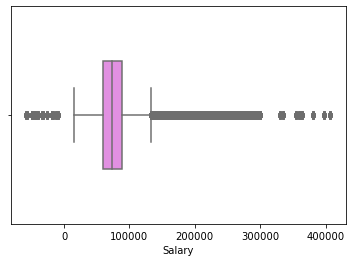

In [52]:
# Creo un boxplot para observar la diferencia entre ambas

sns.boxplot(x = "Salary", 
            data = cop_merg_vuel, 
            width = 0.5,
            color = "violet")
;

- Descartamos la MEDIA debido a la gran cantidad de outliers.
Probamos MEDIANA:

In [53]:
imputacion_mediana = cop_merg_vuel["Salary"].fillna(mediana)
imputacion_mediana

0         92552.0
1         92552.0
2         92552.0
3         92552.0
4         92552.0
           ...   
405619    75616.0
405620    75616.0
405621    75616.0
405622    75616.0
405623    75616.0
Name: Salary, Length: 405624, dtype: float64

In [58]:
# Hago copiaa de seguridad para comparar los distintos métodos

df_prueba_imput = cop_merg_vuel.copy()

In [59]:
# MÉTODOS COMPLEJOS: IterativeImputer

# instanciamos las clases
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos. OJO con el doble corchete de la columna.
imputer_iterative_imputado = imputer_iterative.fit_transform(df_prueba_imput[["Salary"]])

# comprobamos que lo que nos devuelve es un array 
imputer_iterative_imputado

array([[92552.],
       [92552.],
       [92552.],
       ...,
       [75616.],
       [75616.],
       [75616.]])

In [60]:
# MÉTODOS COMPLEJOS: KNN

# instanciamos la clase del KNNImputer

imputer_knn = KNNImputer(n_neighbors = 5)

# ajustamos y transformamos los datos

imputer_knn_imputado = imputer_knn.fit_transform(df_prueba_imput[["Salary"]])

# comprobamos que es lo que nos devuelve es un array

imputer_knn_imputado

array([[92552.],
       [92552.],
       [92552.],
       ...,
       [75616.],
       [75616.],
       [75616.]])

In [61]:
# Ahora añadimos a nuestro dataframe copia ((df_copia) las tres columnas con valores imputados para totalworkingyears.

df_prueba_imput['imputando_con_mediana'] = imputacion_mediana
df_prueba_imput['imputando_II'] = imputer_iterative_imputado
df_prueba_imput['imputando_con_KNN'] = imputer_knn_imputado

df_prueba_imput.sample()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,imputando_con_mediana,imputando_II,imputando_con_KNN
272957,768078,2017,5,1,0,1,2064,206.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,78573.0,Divorced,Nova,4376.36,Standard,2018,12,NaN,NaN,78573.0,78573.0,78573.0


In [62]:
# Para comparar los diferentes resultados, usamos el método describe. 
# Vemos las columnas con valores imputadas y las comparamos con la columna original 'totalworkingyears'
# Nos quedamos con el resultado que menos se aleje de los estadísticos originales.

df_prueba_imput.describe()[['Salary', 'imputando_con_mediana', 'imputando_II', 'imputando_con_KNN']]

,Salary,imputando_con_mediana,imputando_II,imputando_con_KNN
count,302952.000000,405624.000000,405624.000000,405624.000000
mean,79268.825953,77803.298740,79268.825953,79268.825953
std,34992.133508,30345.543901,30240.943132,30240.943132
min,-58486.000000,-58486.000000,-58486.000000,-58486.000000
25%,59262.000000,63899.000000,63899.000000,63899.000000
50%,73479.000000,73479.000000,79268.825953,79268.825953
75%,88612.000000,82940.000000,82940.000000,82940.000000
max,407228.000000,407228.000000,407228.000000,407228.000000


In [63]:
# RESULTADO: II y KNN dan resultados exactamente iguales entre sí. Nos sirve cualquiera de ellos.

# Sustituyo en mi dataframe la columna 'Salary' por los resultados de II. 

mergeado_vuelos['Salary'] = df_prueba_imput['imputando_II']

In [64]:
# Compruebo que ya no quedan nulos.

mergeado_vuelos['Salary'].isnull().sum()

0

Columnas Cancellation Year y Cancellation Month	

En cuanto a las columnas Cancellation Year y Cancellation Month, como presentan un valor de nulos tan elevado (87.66%) y no quiero eliminarlas, voy a sustituir los nulos por "0". De esta forma, puedo mantener los datos que están completos, ya que me aportan información.

In [68]:
mergeado_vuelos["Cancellation Year"].fillna(0, inplace=True)
mergeado_vuelos["Cancellation Month"].fillna(0, inplace=True)

In [69]:
# Compruebo que ya no quedan nulos.

mergeado_vuelos['Cancellation Year'].isnull().sum()

0

In [70]:
mergeado_vuelos['Cancellation Month'].isnull().sum()

0

In [71]:
# Visualizo el df con las imputaciones

mergeado_vuelos.sample(15)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
330012,918163,2018,4,2,0,2,2690,336.25,0,0,Canada,Ontario,Toronto,P2T 6G3,Female,Doctor,125167.000000,Divorced,Nova,13736.13,Standard,2016,8,0.0,0.0
298381,834066,2018,1,1,0,1,942,94.00,0,0,Canada,Quebec,Montreal,H4G 3T4,Male,College,79268.825953,Single,Nova,7897.02,Standard,2017,2,0.0,0.0
386017,378920,2017,2,5,0,5,2230,223.00,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,Bachelor,63722.000000,Married,Nova,6446.92,Standard,2014,11,2018.0,10.0
45914,210226,2017,3,0,0,0,0,0.00,0,0,Canada,Quebec,Montreal,H4G 3T4,Female,Bachelor,81443.000000,Married,Nova,10852.96,Standard,2016,2,0.0,0.0
302840,845319,2017,9,0,0,0,0,0.00,0,0,Canada,Quebec,Tremblant,H5Y 2S9,Male,Bachelor,93105.000000,Married,Nova,3728.87,Standard,2013,1,0.0,0.0
356590,985839,2018,11,9,0,9,2160,216.00,0,0,Canada,Ontario,Toronto,M2M 6J7,Male,College,79268.825953,Single,Star,2549.45,Standard,2017,3,0.0,0.0
245684,701803,2018,10,8,0,8,1168,116.00,0,0,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,94655.000000,Married,Nova,3768.37,Standard,2016,2,0.0,0.0
295450,827275,2017,10,9,6,15,2040,204.00,0,0,Canada,Manitoba,Winnipeg,R2C 0M5,Male,Bachelor,78974.000000,Divorced,Nova,30442.54,Standard,2015,6,0.0,0.0
130172,414305,2017,4,14,6,20,1560,156.00,475,38,Canada,Ontario,Toronto,P5S 6R4,Male,Bachelor,58725.000000,Married,Star,2725.36,Standard,2016,12,0.0,0.0
124310,400958,2018,3,6,0,6,444,55.00,0,0,Canada,Ontario,Thunder Bay,K8T 5M5,Male,College,79268.825953,Single,Nova,2843.15,Standard,2015,12,0.0,0.0


In [72]:
mergeado_vuelos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

Limpieza de datos en columnas:

In [73]:
# Loyalty Number

# Cambio de tipo int a object

mergeado_vuelos["Loyalty Number"] = mergeado_vuelos["Loyalty Number"].astype(object)

In [77]:
# Points Redeemed

# Paso de tipo int a float

mergeado_vuelos["Points Redeemed"] = mergeado_vuelos["Points Redeemed"].astype(float)

In [79]:
# Dollar Cost Points Redeemed	

# Al tratarse de una cantidad de dinero, lo paso a float

mergeado_vuelos["Dollar Cost Points Redeemed"] = mergeado_vuelos["Dollar Cost Points Redeemed"].astype(float)

In [80]:
# Cancellation Year	

# Lo paso de tipo float a int

mergeado_vuelos["Cancellation Year"] = mergeado_vuelos["Cancellation Year"].astype(int)

In [82]:
#Cancellation Month	

# Lo paso de tipo float a int

mergeado_vuelos["Cancellation Month"] = mergeado_vuelos["Cancellation Month"].astype(int)

In [83]:
# Compruebo que se han realizado todos los cambios

mergeado_vuelos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  object 
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  float64
 9   Dollar Cost Points Redeemed  405624 non-null  float64
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

- En cuanto a la columna Country, quiero destacar que todos los valores son iguales y no me va a aportar ningún dato estadístico, pero prefiero mantenerla

------------------------------------------

## Fase 2: Visualización

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes preguntas usando el po de gráfica que consideres más adecuad (podéis ponerle fantasía a las gráficas ;-) ):

**1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?** 

In [87]:
# Agrupo los datos por cada mes y sumo los vuelos que se han reservado en cada uno de ellos

vuelos_por_mes = mergeado_vuelos.groupby('Month')['Flights Booked'].sum().reset_index()
vuelos_por_mes

,Month,Flights Booked
0,1,96936
1,2,96334
2,3,131199
3,4,112511
4,5,142170
5,6,173242
6,7,193431
7,8,169204
8,9,136379
9,10,129461


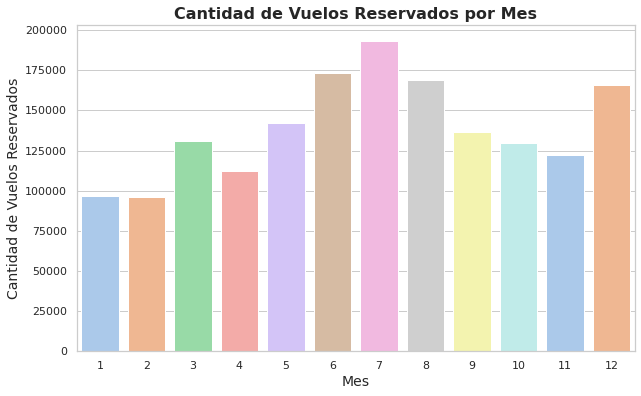

In [112]:
# Voy a crear un barplot para poder visualizar los resultados e interpretarlos 

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Flights Booked', data=vuelos_por_mes, palette="pastel")

# Agregar título y etiquetas
plt.title('Cantidad de Vuelos Reservados por Mes', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Cantidad de Vuelos Reservados', fontsize=14)
plt.xticks(rotation=0)  # Alinear las etiquetas del eje X

# Mostrar el gráfico
plt.show()

Se observa que la cantidad de vuelos es mayor en los meses de junio, julio, agosto y diciembre; coincidiendo con las vacaiones de verano y Navidad. Julio es el mes con la cantidad de vuelos más elevada, y los meses de Enero y Febrero son en los que menos reservas se realizan. Sin embargo, no presentan diferencias significativas con el resto de meses

**2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?** 

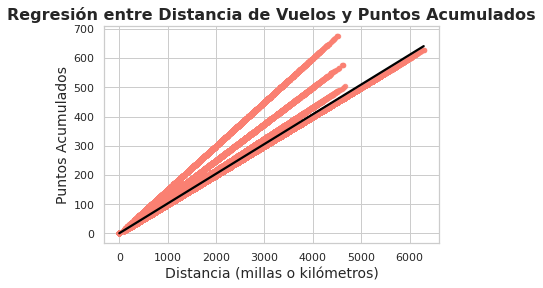

In [132]:
# En este caso voy a utilizar un gráfico de regresión para observar la relación entre las dos variables

sns.regplot(x="Distance", y="Points Accumulated", data=mergeado_vuelos, marker="o", scatter_kws = {"color": "salmon", "s": 20}, line_kws={"color":"black"})

# Agrego etiquetas
plt.xlabel('Distancia (millas o kilómetros)', fontsize=14)
plt.ylabel("Puntos Acumulados", fontsize=14)

# Agrego título
plt.title("Regresión entre Distancia de Vuelos y Puntos Acumulados", fontsize=16, fontweight="bold")

# Mostrar el gráfico
plt.show()

Observamos una correlación positiva, ascendente. Esto quiere decir que cuando los pasajeros hacen vuelos más largos, acumulan más puntos 

**3. ¿Cuál es la distribución de los clientes por provincia o estado?** 

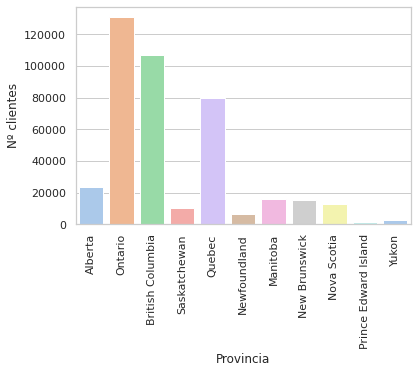

In [133]:
# Plasmo los resultados en un countplot

sns.countplot(x = "Province", data = mergeado_vuelos, palette = "pastel")

# giramos las etiquetas del eje "x", en este caso a 90º. 
plt.xticks(rotation = 90)

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()' ya que estamos creando solo una gráfica
plt.xlabel("Provincia")
plt.ylabel("Nº clientes");

Se observa una gran diferencia entre la cantidad de clientes de las distintas provincias. Existen dos provincias que destacan por encima del resto, que son Ontario y Columbia, que superan los 100000 clientes, y están seguidas por Quebec, con 80000. El Numero de clientes del resto de prvincias se sitúa por debajo de los 20000.

**4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?**

In [134]:
# Calculo el salario promedio por nivel educativo
salario_promedio = mergeado_vuelos.groupby("Education")["Salary"].mean().reset_index()

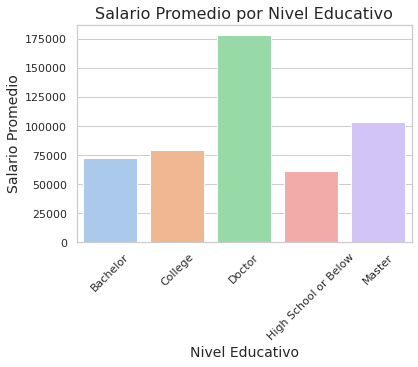

In [137]:
# Realizo un barplot para observar las diferencias entre las variables (una numérica y otra categórica)

# Calcular el salario promedio por nivel educativo
sns.barplot(x="Education", y="Salary", data=salario_promedio, palette="pastel")

# Agrego etiquetas
plt.xlabel("Nivel Educativo", fontsize=14)
plt.ylabel("Salario Promedio", fontsize=14)

# Agrego título
plt.title("Salario Promedio por Nivel Educativo", fontsize=16)

# Mostrar la gráfica
plt.xticks(rotation=45)  
plt.show()

En este gráfico podemos observar que a mayor nivel educativo, mayor es el salario. Hay una diferencia significativa en el caso de la columna Doctor, ya que la media salarial representa casi el doble que el resto de niveles.

**5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?** 

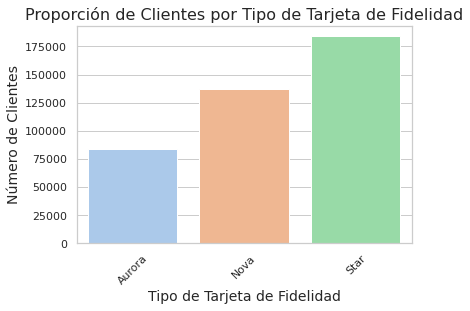

In [139]:
# utilizo un countplot para estudiar los resultados

# Crear el gráfico de conteo
sns.countplot(x="Loyalty Card", data=mergeado_vuelos, palette="pastel")

# Agrego etiquetas
plt.xlabel("Tipo de Tarjeta de Fidelidad", fontsize=14)
plt.ylabel("Número de Clientes", fontsize=14)

# Agrego título
plt.title("Proporción de Clientes por Tipo de Tarjeta de Fidelidad", fontsize=16)

# Mostrar la gráfica
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.show()

Se puede observar que la tarjeta "Star" es la más popular entre los clientes, suprando los 175000. Le sigue la tarjeta Nova con unos 130000, y la tarjeta "Aurora" es la menos elegida, solanete por unos 80000 clientes. 

**6. ¿Cómo se distribuyen los clientes según su estado civil y género?** 

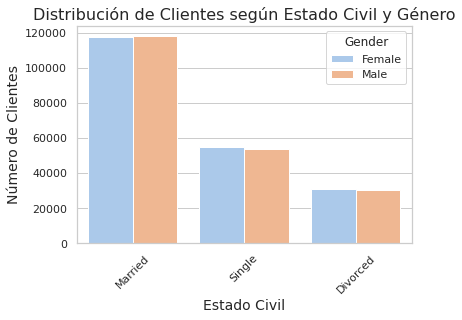

In [142]:
# Utilizo un countplot, que me permita observar los resultados tanto por estado civil como por género

# Creo el gráfico 
sns.countplot(x="Marital Status", hue="Gender", data=mergeado_vuelos, palette="pastel")

# Agrego etiquetas
plt.xlabel("Estado Civil", fontsize=14)
plt.ylabel("Número de Clientes", fontsize=14)

# Agrego título
plt.title("Distribución de Clientes según Estado Civil y Género", fontsize=16)

# Mostrar la gráfica
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.show()

En primer lugar, se puede ver que en cualquiera de los tres estados civiles resgistrados en el gráfico, prácticamente no existe diferencia entre hombres y mujeres.
Se observa que la mayoría de clientes están casados (rozando los 120000). A estos les sigue el grupo de los solteros, que se reduce a la mitad (unos 50000). Y por debajo, se encuentra el grupo de divorciados con 30000 clientes.

--------------------

## Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo 

Utilizando un conjunto de datos que hemos compar do, se busca evaluar si existen diferencias significa vas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos a seguir son:

**1. Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.**

In [143]:
# Filtro las columnas 
mergeado_filtrado = mergeado_vuelos[["Flights Booked", "Education"]]

In [144]:
# Visualizo los datos
mergeado_filtrado.head()

,Flights Booked,Education
0,3,Bachelor
1,2,Bachelor
2,6,Bachelor
3,4,Bachelor
4,0,Bachelor


**2. Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estándar, los percentiles…) del número de vuelos reservados para cada grupo.**

In [175]:
# Agrupo los datos por nivel educativo, calculo la MEDIA, MEDIANA, VARIANZA y DESVIACIÓN ESTÁNDAR, y lo convierto en un df

nivel_educativo = mergeado_vuelos.groupby("Education")['Flights Booked']

In [176]:
nivel_educativo.agg(["mean", "median", "var", "std"]).reset_index()

,Education,mean,median,var,std
0,Bachelor,4.091093,1.0,27.217041,5.216995
1,College,4.153012,1.0,27.479991,5.242136
2,Doctor,4.146281,1.0,27.563479,5.250093
3,High School or Below,4.155777,1.0,27.400523,5.234551
4,Master,4.184014,1.0,27.147166,5.210294


In [180]:
# MODA

# Calcular la moda y mostrar todas las modas
moda = nivel_educativo.agg(pd.Series.mode)      # utilizo la librería de pandas para extraer la moda

# Mostrar resultados
print(f"La moda por nivel educativo es:\n{moda}")

La moda por nivel educativo es:
Education
Bachelor                0
College                 0
Doctor                  0
High School or Below    0
Master                  0
Name: Flights Booked, dtype: int64


In [186]:
# PERCENTILES

percentile_25_50_75 = np.percentile(mergeado_filtrado["Flights Booked"], [25, 50, 75])
percentile_25_50_75

# mostramos los resultados
print(f'El percentil 25 de la columna "Flights Booked" es: {percentile_25_50_75[0]}')
print(f'El percentil 50 de la columna "Flights Booked" es: {percentile_25_50_75[1]}')
print(f'El percentil 75 de la columna "Flights Booked" es: {percentile_25_50_75[2]}')

El percentil 25 de la columna "Flights Booked" es: 0.0
El percentil 50 de la columna "Flights Booked" es: 1.0
El percentil 75 de la columna "Flights Booked" es: 8.0


Interpretación
- El percentil 25 (primer cuartil) nos indica que el 25% de los clientes ha reservado 0 vuelos.
- El percentil 50 (segundo cuartil) nos indica que el 50% de los clientes ha reservado 1 vuelo o menos.
- El percentil 75 (tercer cuartil) nos indica que el 75% de clientes ha reservado 8 o  menos vuelos. 

In [191]:
# FRECUENCIA ABSOLUTA Y RELATIVA

#frecuencia_absoluta = mergeado_vuelos
frecuencia_absoluta = mergeado_filtrado['Flights Booked'].value_counts()

# calculamos la tabla de frecuencia relativa incluyendo el parámetro "normalize" para que nos lo convierta en tanto por 1. 
frecuencia_relativa = mergeado_filtrado['Flights Booked'].value_counts(normalize=True) * 100

# creamos un DataFrame para mostrar ambas tablas
tabla_frecuencias = pd.DataFrame({
    'Flights Booked': frecuencia_absoluta.index,
    'Frecuencia Absoluta': frecuencia_absoluta.values,
    'Frecuencia Relativa (%)': frecuencia_relativa.values
})
# vemos la tabla de frecuencias
tabla_frecuencias

,Flights Booked,Frecuencia Absoluta,Frecuencia Relativa (%)
0,0,197992,48.811707
1,3,18228,4.493817
2,11,15705,3.871812
3,5,15084,3.718715
4,7,14561,3.589778
5,8,14357,3.539485
6,9,14164,3.491904
7,6,13847,3.413753
8,2,13641,3.362967
9,10,13363,3.294430


In [192]:
# TABLA DE CONTINGENCIA

# queremos analizar cómo se distribuyen el número de vuelos reservados por los clientes en función de su nivel educativo.
# creamos  la tabla de contingencia usando el método crosstab de pandas
tabla_contingencia = pd.crosstab(mergeado_filtrado["Education"], mergeado_filtrado["Flights Booked"], normalize=True) * 100

tabla_contingencia

Flights Booked,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Education,,,,,,,,,,,,,,,,,,,,,,
Bachelor,30.680877,1.959697,2.076554,2.819360,1.980405,2.328265,2.121669,2.231130,2.208449,2.167032,2.042532,2.393596,1.600497,1.673718,1.074394,1.006104,0.660217,0.589709,0.446966,0.237165,0.174546,0.085547
College,12.286748,0.767953,0.864840,1.137014,0.791127,0.956797,0.864101,0.908970,0.890726,0.890973,0.839940,1.006104,0.659971,0.665148,0.447212,0.418121,0.282281,0.252204,0.188845,0.087273,0.075932,0.029831
Doctor,2.135722,0.142743,0.145208,0.201665,0.144469,0.149153,0.149893,0.163205,0.163945,0.151372,0.150879,0.170108,0.105023,0.114392,0.080370,0.070509,0.051032,0.038952,0.035008,0.019476,0.012820,0.006163
High School or Below,2.256523,0.156302,0.176272,0.195748,0.142990,0.177997,0.156795,0.172820,0.169122,0.170848,0.154823,0.184654,0.119569,0.123020,0.082835,0.081356,0.045855,0.047828,0.034268,0.016025,0.016025,0.004438
Master,1.451837,0.096148,0.100093,0.140031,0.101818,0.106503,0.121295,0.113652,0.107242,0.111680,0.106256,0.117350,0.074453,0.081849,0.054977,0.046595,0.034022,0.032542,0.024160,0.008875,0.005670,0.004191


Podemos observar que las personas con Bachillerato tienden a no realizar reservas de vuelos. Sin embargo, de un vuelo en adelante osn los que mayor índice tienen.
Se puede decir que los clientes con Bachillerato son los que más vuelos reservan

**3. Prueba Estadística: Realiza una prueba A/B Testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.**